## Data Cleaning

Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters.

In [ ]:
#imports libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [ ]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | As someone who flies relentl...,5.0,2nd September 2024,United Kingdom
1,✅ Trip Verified | Flew with British Airways ...,4.0,1st September 2024,United Kingdom
2,✅ Trip Verified | Straightforward check in T...,2.0,30th August 2024,United Kingdom
3,Not Verified | I am beyond upset and disgusted...,8.0,28th August 2024,United Kingdom
4,✅ Trip Verified | I purchased round trip dir...,1.0,28th August 2024,Hong Kong


We will also create a column which mentions if the user is verified or not.

In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
df['verified']

,verified
0,True
1,True
2,True
3,False
4,True
...,...
3495,False
3496,False
3497,False
3498,False


### Cleaning Reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [ ]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk # import nltk
import re

nltk.download('stopwords') # download stopwords
nltk.download('wordnet') # download wordnet

lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | As someone who flies relentl...,5.0,2nd September 2024,United Kingdom,True,someone fly relentlessly british airway busine...
1,✅ Trip Verified | Flew with British Airways ...,4.0,1st September 2024,United Kingdom,True,flew british airway club europe saturday st au...
2,✅ Trip Verified | Straightforward check in T...,2.0,30th August 2024,United Kingdom,True,straightforward check new site club check work...
3,Not Verified | I am beyond upset and disgusted...,8.0,28th August 2024,United Kingdom,False,verified beyond upset disgusted disregard lack...
4,✅ Trip Verified | I purchased round trip dir...,1.0,28th August 2024,Hong Kong,True,purchased round trip direct flight business cl...


### Cleaning/Fromat date

In [ ]:
df.dtypes

,0
reviews,object
stars,float64
date,object
country,object
verified,bool
corpus,object


In [ ]:
import pandas as pd

def remove_ordinal(date_str):
    """Removes the ordinal indicator from a date string using pandas."""
    # Use regex to remove ordinal indicators (st, nd, rd, th)
    date_str = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
    return pd.to_datetime(date_str, format='%d %B %Y').strftime('%d %B %Y')

# Apply the function to the 'date' column
df['date'] = df['date'].apply(remove_ordinal)

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df.date.head()

,date
0,2024-09-02
1,2024-09-01
2,2024-08-30
3,2024-08-28
4,2024-08-28


### Cleaning ratings with stars

In [ ]:
#check for unique values
df.stars.unique()

array([ 5.,  4.,  2.,  8.,  1.,  9., 10.,  3.,  6.,  7., nan])

In [ ]:
# remove the \t and \n from the ratings
df.stars = df.stars.astype(str).str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.stars.value_counts()

,count
stars,
1.0,863
2.0,408
3.0,399
8.0,338
10.0,288
7.0,274
9.0,272
5.0,247
4.0,235


There are 5 rows having values "None" in the ratings. We will drop all these 5 rows.

In [ ]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [ ]:
#check the unique values again
df.stars.unique()

array(['5.0', '4.0', '2.0', '8.0', '1.0', '9.0', '10.0', '3.0', '6.0',
       '7.0', 'nan'], dtype=object)

## Check for null Values

In [ ]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3499
                       True     False     False        1
Name: count, dtype: int64

In [ ]:
df.country.isnull().value_counts()

,count
country,
False,3499
True,1


We have two missing values for country. For this we can just remove those two reviews (rows) from the dataframe.

In [ ]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3499, 6)

In [ ]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | As someone who flies relentl...,5.0,2024-09-02,United Kingdom,True,someone fly relentlessly british airway busine...
1,✅ Trip Verified | Flew with British Airways ...,4.0,2024-09-01,United Kingdom,True,flew british airway club europe saturday st au...
2,✅ Trip Verified | Straightforward check in T...,2.0,2024-08-30,United Kingdom,True,straightforward check new site club check work...
3,Not Verified | I am beyond upset and disgusted...,8.0,2024-08-28,United Kingdom,False,verified beyond upset disgusted disregard lack...
4,✅ Trip Verified | I purchased round trip dir...,1.0,2024-08-28,Hong Kong,True,purchased round trip direct flight business cl...
...,...,...,...,...,...,...
3494,LHR-DEL. RTN Club World. Excellent service on ...,9.0,2014-10-28,United Kingdom,False,lhr del rtn club world excellent service secto...
3495,Flew BA from Toronto to New Delhi via London i...,9.0,2014-10-28,Canada,False,flew ba toronto new delhi via london premium e...
3496,Round-trip IAD-LHR in early October and it was...,2.0,2014-10-28,United States,False,round trip iad lhr early october one best trip...
3497,Arrived at Gatwick to find out that our pre-pa...,8.0,2014-10-28,United Kingdom,False,arrived gatwick find pre paid assigned seat co...


*****

Now our data is all cleaned and ready for data visualization and data analysis.

In [ ]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

## Exploratory Data Analysis

In [ ]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS


In [ ]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | As someone who flies relentl...,5.0,2024-09-02,United Kingdom,True,someone fly relentlessly british airway busine...
1,✅ Trip Verified | Flew with British Airways ...,4.0,2024-09-01,United Kingdom,True,flew british airway club europe saturday st au...
2,✅ Trip Verified | Straightforward check in T...,2.0,2024-08-30,United Kingdom,True,straightforward check new site club check work...
3,Not Verified | I am beyond upset and disgusted...,8.0,2024-08-28,United Kingdom,False,verified beyond upset disgusted disregard lack...
4,✅ Trip Verified | I purchased round trip dir...,1.0,2024-08-28,Hong Kong,True,purchased round trip direct flight business cl...


#### What is the average overall rating given for British Airways?

In [ ]:
df.stars.mean()

4.586098398169336

#### What is the total counts for each ratings?


Text(0.5, 0.98, 'Counts for each ratings')

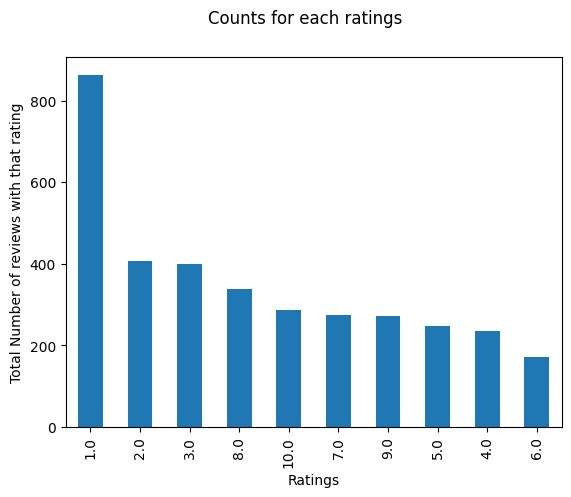

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
# the column name is 'count' not 'stars'
pct_values = (df_ratings['count'].values/ df_ratings['count'].values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values
df_ratings.index.name = 'stars'
df_ratings.reset_index(inplace=True)

In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [ ]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts',}, inplace=True)

In [ ]:
df_ratings

,Stars,total_counts,count,pct_values
0,0,1.0,863,24.69
1,1,2.0,408,11.67
2,2,3.0,399,11.41
3,3,8.0,338,9.67
4,4,10.0,288,8.24
5,5,7.0,274,7.84
6,6,9.0,272,7.78
7,7,5.0,247,7.07
8,8,4.0,235,6.72
9,9,6.0,172,4.92


<ipython-input-23-4c86a9bb910a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
<ipython-input-23-4c86a9bb910a>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

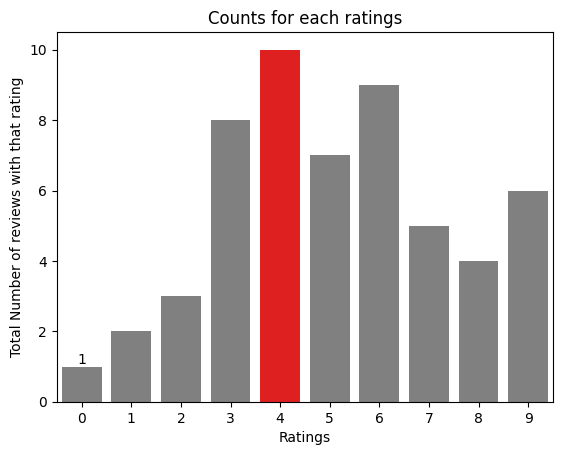

In [ ]:

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")


In [ ]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


#### Which country most review comes from?  

In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
df_country_review.rename(columns={'index':'country','total_reviews':'country'}, inplace=True)


Text(0.5, 1.0, 'Maximum number of review by country')

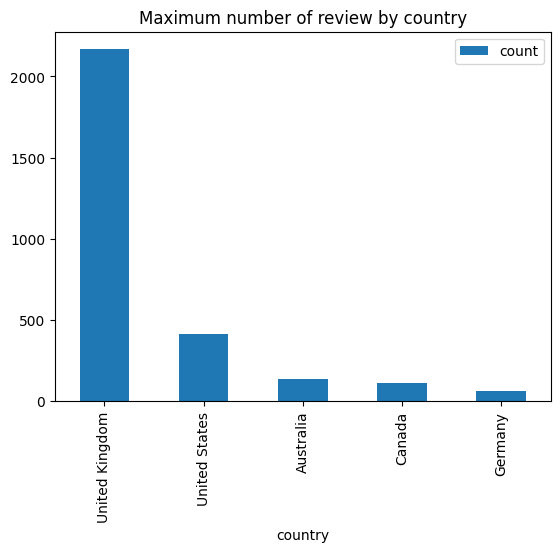

In [ ]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

#### Which country provided on average highest ratings?

In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

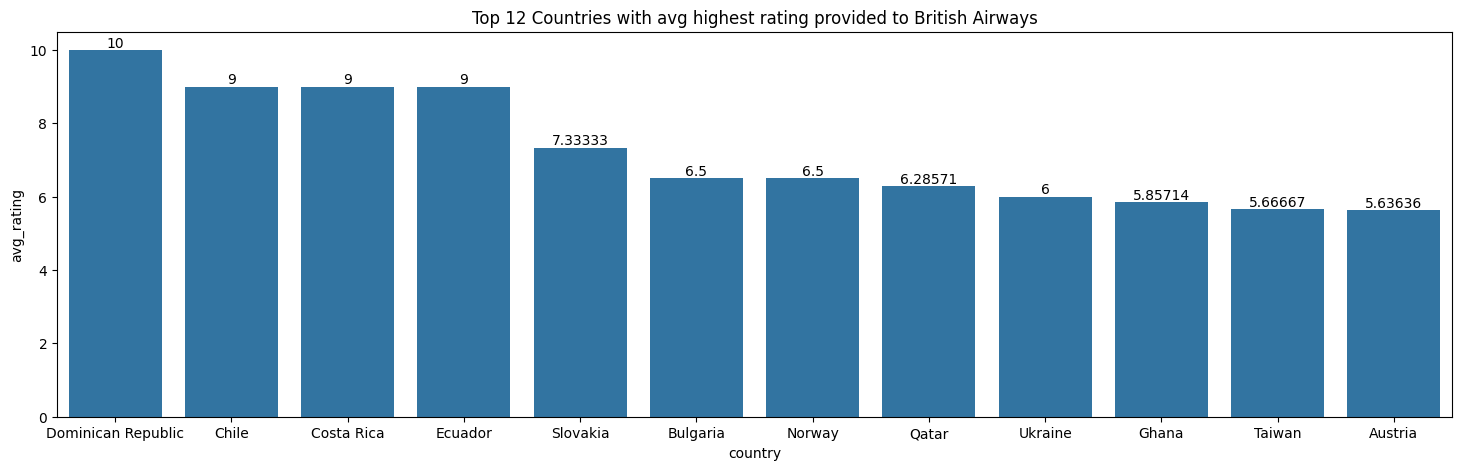

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

## Word Frequency

In [ ]:
!pip install pandas
import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
df1 = df
reviews = df['corpus']
df1['reviews'] = df['reviews'].str.replace('|,The,BA,[],verfied,British,.,-','', regex=False) ## Setting figure, ax into variables )
reviews1 = df1 ['reviews']
# Now you can access the 'text' column (assuming it exists in your CSV)
#reviews = df['reviews']

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming reviews1 is a Pandas Series
reviews = reviews1 # Use the reviews1 variable directly

#split the text of all reviews into a list of words
words = reviews.str.cat(sep=' ').split()

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'I'),
  Text(1, 0, 'The'),
  Text(2, 0, 'BA'),
  Text(3, 0, '|'),
  Text(4, 0, 'Verified'),
  Text(5, 0, 'British'),
  Text(6, 0, '-'),
  Text(7, 0, '✅'),
  Text(8, 0, 'service'),
  Text(9, 0, 'London'),
  Text(10, 0, 'seat'),
  Text(11, 0, 'crew'),
  Text(12, 0, 'Airways'),
  Text(13, 0, 'food'),
  Text(14, 0, 'seats'),
  Text(15, 0, 'time'),
  Text(16, 0, 'cabin'),
  Text(17, 0, 'good'),
  Text(18, 0, 'Trip'),
  Text(19, 0, 'staff')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.



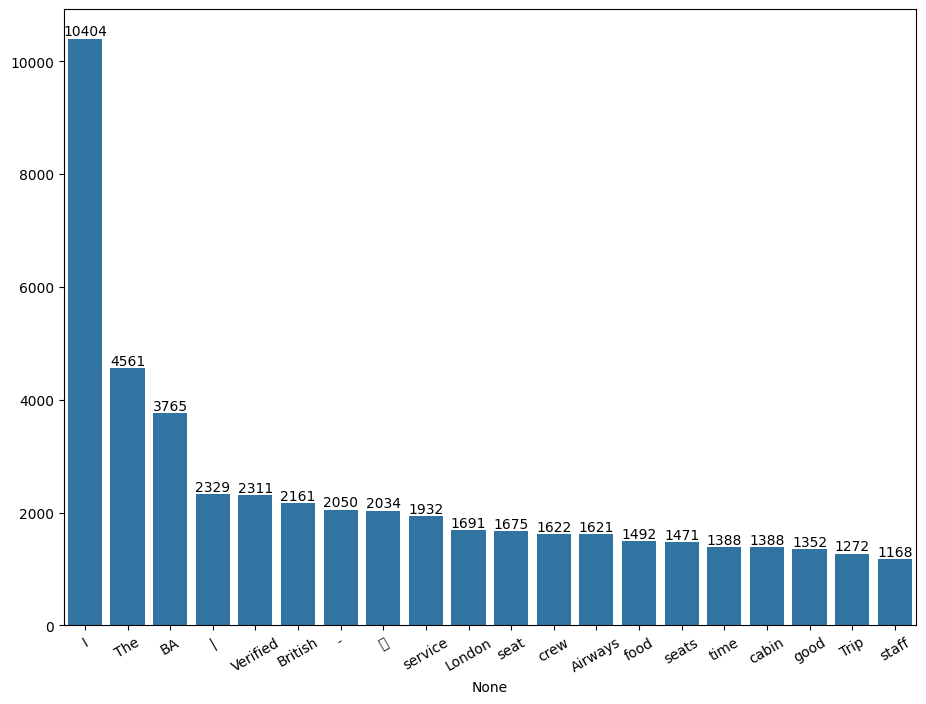

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Service is most talked about the airline followed by "Seat" and "Crew" which are all very important to customers in terms of service.